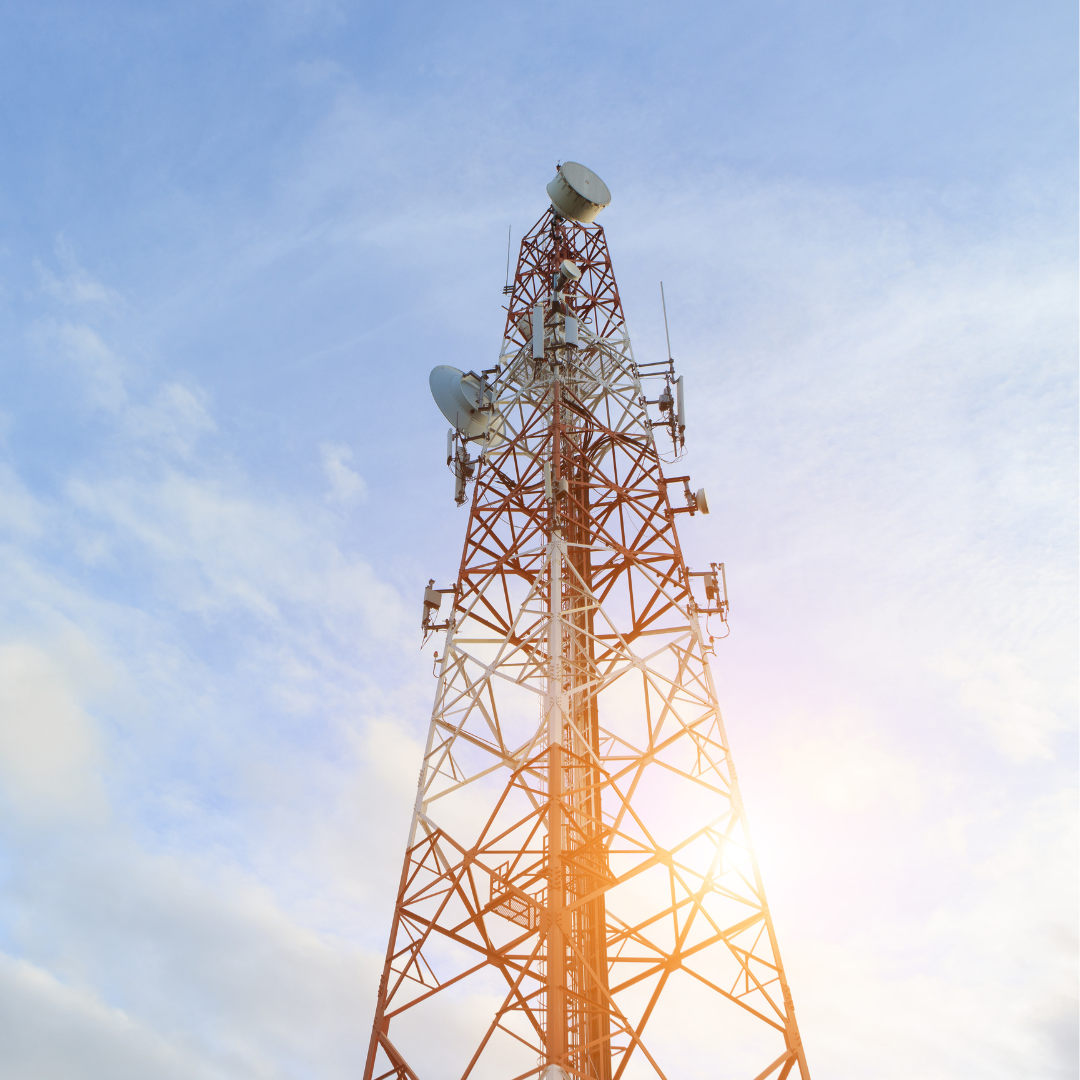

Photo from [canva](https://www.canva.com/design/DAFIXmlBrok/oYTH_fIUSekmVxc0aOVRCQ/edit?utm_content=DAFIXmlBrok&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton) 

## 1. BUSINESS UNDERSTANDING

The dataset comes from SyriaTel, Telecommunications company, and it is related to the number of clients lost and the financial impact it has in terms of money reduction to the company. The classification goal is to predict whether a customer will ('soon') stop doing business with SyriaTel.

One of the major challenges in the business sector is predicting and analyzing customer behavior patterns. Psychological (motivation, perception, learning, beliefs, and attitudes), personal (age and life cycle stage, occupation, economic circumstances, lifestyle, personality, and self concept), social (reference groups, family, roles, and status), and cultural (religious, ethnic, and racial) factors all have an impact on consumer behavior (culture, subculture, social class system).

Machine language can work in conjunction with Big Data tools to manage unstructured and rapidly expanding data thanks to technological advancements. Consumer behavior is one of the key factors taken into account in the commercial sector.

We may now employ machine learning algorithms to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company and this will also give the client that is SyriaTel a deeper insight on the variables mainly apprectiated by the customers and which are not appreciated so that they can close the needed gaps and have a higher retaining capacity of the clients.

## Data Understanding

The data that I will utilize for this project comes from SyriaTel Telecom and includes information on 3,333 users.


Since 2000, Syriatel has dominated the country's mobile communications industry. By putting a strong emphasis on social responsibility and consumer happiness, the company has effectively built its name.

At Syriatel, they consider it their first duty to provide customers with a wide selection of high-quality goods and services that satisfy their needs and improve their quality of life at competitive prices.

SyriaTel has created a network of 24 service sites that spans the entire country of Syria. Over 23,000 consumers' inquiries are answered each day at the 4 call centers in Damascus, Aleppo, Lattakia, and Tartous.
One of the telecom companies with the quickest growth in the region is Syriatel. There are 371 young men and women among its 3,488 employees who were chosen via the Student Support Program. Syriatel personnel are happy to serve more over 8 million consumers today and are highly skilled.
To serve its customers wherever they may be, SyriaTel has a network of radio base stations that, as of the end of 2016, included 6171 sites for 2G service and 3286 sites for 3G service.
SyriaTel has 199 international roaming partners in 116 nations, which is not the least of its strengths.

We have one dataset for this project, the dataset is from kaggle and it can be downloaded from [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).


The target variable is the churn variable that contains True or False on the factor that Syria will loose that client soon

Features include:<br>


state - Client's residence.<br>
account length - How long they have had the subscription.<br>
area code - Client's area code.<br>
phone number - Client's phone number.<br>
international plan - Is the client subscribed to the international plan?(yes/no).<br>
voice mail plan - Is the client subscribed to the voice mail plan?(yes/no).<br>
number vmail messages - The number of the voicemail messages.<br>
total day minutes, calls, charge - the client's daily minutes, calls, and charges.<br>
total eve minutes, calls, charge - the client's evening minutes, calls, and charges.<br>
total night minutes, calls, charge -the client's night minutes, calls, and charges.<br>
total intl minutes, calls, charge - the client's tital international minutes, calls, and charges.<br>
customer service calls - how many times the customer service line was called.<br>
churn - The response variable we will be targeting.<br>

# 2. Data Preparation

### Loading Packages

In [1]:
#Loading the necessary packages for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,precision_score,recall_score,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV

### Loading the Dataset

In [2]:
#Loading the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

#### Exploring the dataframe

In [3]:
#Previewing the head of the dataframe
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Remark:

The dataset contains 21 columns

In [4]:
#Having a look at the dataset's shape
print("Dataset's shape",data.shape)

Dataset's shape (3333, 21)


In [5]:
#Having a look at the datasets information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Having a look at the dataset's statistical description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


## 3. Data Cleaning

I will need to apply data cleaning techniques to prepare and prepare my data for medelling. The techniques to be used are:<br>
1. Consistency <br>
2. Validity <br>
3. Completeness <br>
4. Collinearity <br>

### 3.1 Consistency

Examining the rows and columns for any instances of duplication.

In [7]:
data.duplicated().sum()

0

The dataset doesn't have any duplicated values.

### 3.2 Validity

Verify that every column in the dataset is accurate and appropriate for this analysis, and remove any that are not.

I'll drop Phone Number variable because it doesn't seem to have any effect on the dataset.

In [8]:
#Dropping the phone number variable
data = data.drop(['phone number'], axis = 1)

The churn variable is in boolean type, I will convert it to an integer so that 0 represents False and 1 represents True.

In [9]:
#Converting the churn boolean variable to an integer
data['churn'] = data['churn'].astype(int)
data['churn'].dtype

dtype('int32')

### 3.3 Completeness

Checking for missing values in the dataset

In [10]:
#checking for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data doesn't have any missing values.

### 3.4 Collinearity

Checking for collinearity in the dataset.

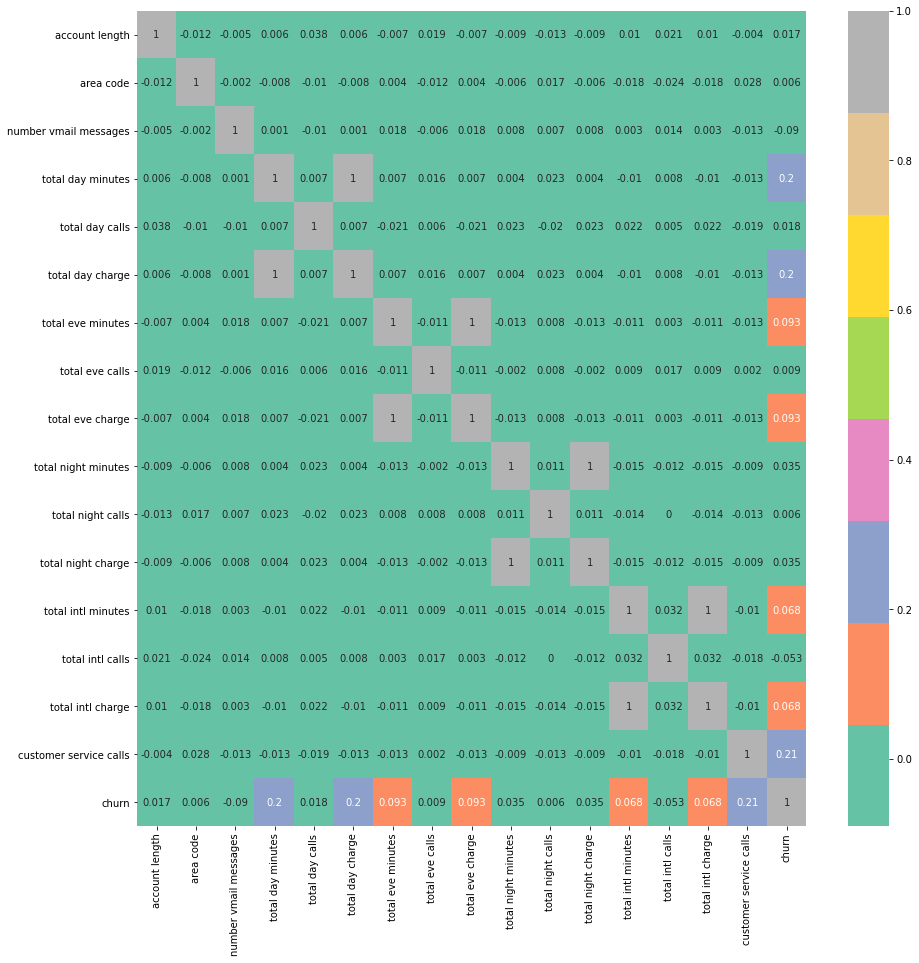

In [11]:
# collinearity check
corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr.round(3),annot = True,cmap = 'Set2')
plt.show()

The dataset contains highly correlated with a correlation of 1 as per the above graph: <br>
    a. Total day minutes and Total day charge <br>
    b. Total Eve minutes and Total eve charge <br>
    c. Total Night minutes and Total Night charge <br>
    d. Total Intl minutes and Total Intl charge <br>
    I will go ahead and drop all the variables with minutes so as to reduce multicollinearity

In [12]:
#Creating a function for the Variance Inflation Factor
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [13]:
#Calculating VIF having dropped the minutes variables so as to reduce high multicollinearity.
calculate_vif(df=data, features=['account length', 'area code', 'number vmail messages',
                                 'total day calls', 'total day charge',
                                 'total eve calls', 'total eve charge',
                                 'total night calls', 'total night charge', 
                                 'total intl calls', 'total intl charge',
                                 'customer service calls'])

,VIF,Tolerance
account length,1.002775,0.997233
area code,1.002344,0.997662
number vmail messages,1.000930,0.999071
total day calls,1.003877,0.996138
total day charge,1.001319,0.998683
total eve calls,1.001359,0.998643
total eve charge,1.001481,0.998521
total night calls,1.001967,0.998037
total night charge,1.001495,0.998508
total intl calls,1.002972,0.997037


The data has a reasonable Variance Inflation Factor as it is now below 5.

### 3.5 Exploratory Data Analysis

Let's look at the distribution of the various attributes in our dataset to try to better understand it.<br>

Answer a few questions:<br>

i. Which State provides the highest income to SyriaTel?<br>
ii. Does SyriaTel make more from those with international plan or those without the plan?<br>
iii. Which time of the day does SyriaTel make most income?

In [14]:
#Recalling our data columns so as to have a view of the relations to consider
data.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [15]:
#Creating a new variable called income that contains the charges charged by SyriaTel
data['income' ]= data['total day charge'] +data['total eve charge'] + data['total night charge'] + data['total intl charge']

In [16]:
#Previewing the head so as to ensure that it is inclusive of the newly created column
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,income
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


### Which State provides the highest income to SyriaTel?

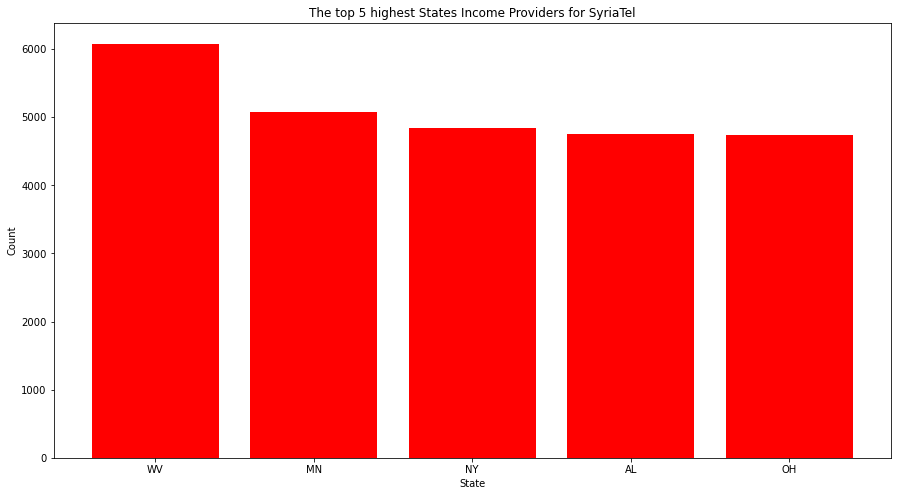

In [17]:
# All the states in the dataset
state_income = data[['state', 'income']]

# Groupby state and selectingbthe top 5
state_income= state_income.groupby(['state']).sum().reset_index().nlargest(5, 'income')

# plotting
fig, ax = plt.subplots(figsize=(15, 8))

income = state_income['income']
label = state_income['state']

ax.bar(label, income, color='red')

ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("The top 5 highest States Income Providers for SyriaTel");

West Virginia provides the highest income to SyriaTel of 6000

### Does SyriaTel make more from those with international plan or those without the plan?

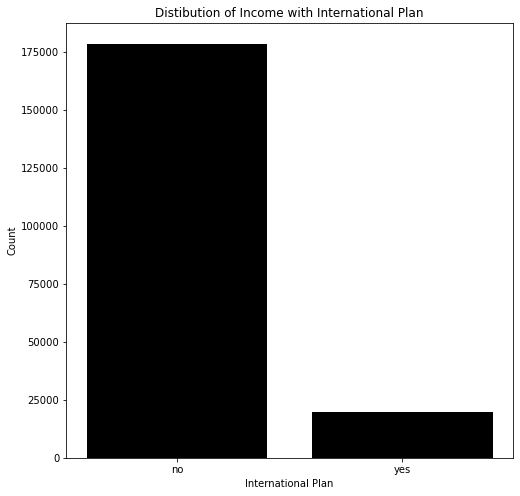

In [18]:
# All the states in the dataset
intl_income = data[['international plan', 'income']]

# Groupby international plan
intl_income= intl_income.groupby(['international plan']).sum().reset_index().nlargest(5, 'income')

# plotting
fig, ax = plt.subplots(figsize=(8, 8))

intl = intl_income['income']
label1 = intl_income['international plan']

ax.bar(label1, intl, color='black')

ax.set_xlabel("International Plan")
ax.set_ylabel("Count")
ax.set_title("Distibution of Income with International Plan");

Syria get's a higher income from those without an international plan

### Which time of the day does SyriaTel make most income?

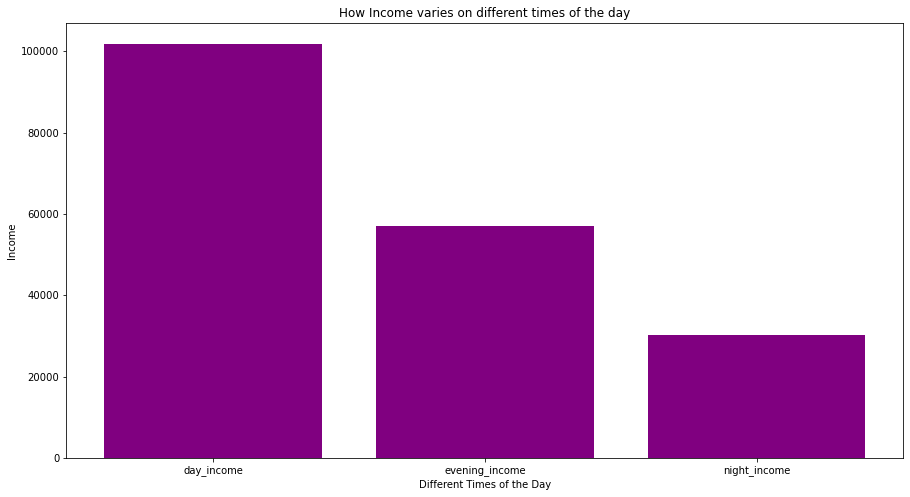

In [19]:
#Creating variables for the total income on the 3 different times of the day
day_income = data['total day charge'].sum()
evening_income = data['total eve charge'].sum()
night_income = data['total night charge'].sum()

#plotting
fig, ax = plt.subplots(figsize=(15, 8))

income_diff_times_of_day = [day_income, evening_income, night_income]
label2 = ['day_income', 'evening_income', 'night_income']

ax.bar(label2, income_diff_times_of_day, color='purple')

ax.set_xlabel("Different Times of the Day")
ax.set_ylabel("Income")
ax.set_title("How Income varies on different times of the day");

Daytime charges are followed by evening charges, then nighttime charges as the order of revenue generation for SyriaTel.

### 3.6 Data PreProcessing

Converting the Categorical variables i.e International Plan and Voice Mail Plan to dummies

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(data, columns = ['international plan', 'voice mail plan'],drop_first=True, dtype = int)
print(encoded_data.dtypes)

state                      object
account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int32
income                    float64
international plan_yes      int32
voice mail plan_yes         int32
dtype: object


In [21]:
#Converting the state variable to a dummy
states_dummies = pd.get_dummies(encoded_data["state"], prefix="STATES")
encoded_data = pd.concat([encoded_data, states_dummies], axis = 1)
encoded_data.head()

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,STATES_SD,STATES_TN,STATES_TX,STATES_UT,STATES_VA,STATES_VT,STATES_WA,STATES_WI,STATES_WV,STATES_WY
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Drpping the state variable
encoded_data.drop('state', axis =1, inplace=True)

## 4. Modelling

### Splitting X and Y values

In [23]:
#Splitting the dataset y to have the jtarget variable and X to have the predictors
y = encoded_data['churn']
X = encoded_data.drop(['churn'], axis = 1)

#### Train Test Split of the data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 70), (1000, 70), (2333,), (1000,))

# Scaling

We are scaling the data using the Standard Scaler method. Standardize the data by making the mean of the distribution zero and the majority of the data will be between -1 and 1.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [27]:
# We are going to scale the original X and Y data in order to use the cross validation score

X_scaler = StandardScaler()
    
X_scaler.fit(X)
    
X_scaled = pd.DataFrame(X_scaler.transform(X), columns=X.columns)


## Building models

We create a function that would later look through the model classifiers and calculate the various scores to evaluate each model.

We chose to run the following classifiers for our data:

Logistic Regression K-Nearest Neighbor Decision Tree 

In [28]:
def Train_Test_Scores(model):
    
    model.fit(X_train_scaled,y_train)

    print('Test_Accuracy:',  model.score(X_train_scaled,y_train))
    print('Test_Accuracy:', model.score(X_test_scaled,y_test))
    print('Recall:', precision_score(y_test,y_preds))
    print('Precision:', f1_score(y_test,y_preds))
    plot_confusion_matrix(model, X_test_scaled, y_test, cmap="Blues")

### Logistic Regression Model

We will run the model regularly and then tune logistic regression as well.

In [29]:
#Checking the imbalance on the data
y.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Given the unbalance data of SyriaTel, we use class_weight=’balanced’) method for our Logistic Regression model. This will give weight to both the majority and minority variables.

Test_Accuracy: 0.7741105872267466
Test_Accuracy: 0.763
Recall: 0.143
Precision: 0.2502187226596675


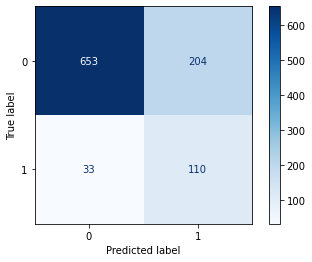

In [30]:
LogReg =(LogisticRegression(solver='lbfgs', class_weight='balanced'))
# fit  the model
LogReg.fit(X_train_scaled, y_train)

#Get the X_test Predict values
y_preds = LogReg.predict(X_test)

Train_Test_Scores(LogReg)

### KNN MODEL USING SMOTE

We will use SMOTE due to the heavily imbalanced our dataset is.

In [31]:
# Previous original class distribution
from imblearn.over_sampling import SMOTE
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_scaled_resampled, y_train_resampled = SMOTE().fit_resample(X_train_scaled, y_train) 

# Preview synthetic sample class distribution
print('\n')

print(pd.Series(y_train_resampled).value_counts()) 

0    1993
1     340
Name: churn, dtype: int64


1    1993
0    1993
Name: churn, dtype: int64


Train_Accuracy: 0.9086803813346713
Test_Accuracy: 0.728
Recall: 0.6013986013986014
Precision: 0.2857142857142857
F1_Score: 0.38738738738738737
mean_CV_recall: 0.064196735395189


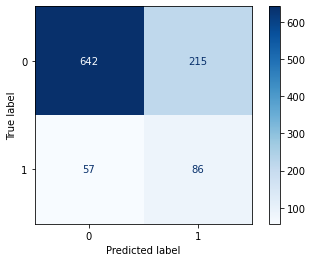

In [32]:
knn = KNeighborsClassifier() 

knn.fit(X_train_scaled_resampled, y_train_resampled)
    
print('Train_Accuracy:', knn.score(X_train_scaled_resampled,y_train_resampled))
print('Test_Accuracy:', knn.score(X_test_scaled,y_test))
print('Recall:', recall_score(y_test,knn.predict(X_test_scaled)))
print('Precision:', precision_score(y_test,knn.predict(X_test_scaled)))
print('F1_Score:',f1_score(y_test,knn.predict(X_test_scaled)))
print('mean_CV_recall:', np.mean(cross_val_score(knn, X_scaled, y, scoring="recall", cv = 5)))

plot_confusion_matrix(knn, X_test_scaled, y_test, cmap="Blues")

In [33]:
param_grid = {
     'n_neighbors': list(range(1, 20, 2)),
     'weights': ['uniform','distance'],
     'metric': ['euclidean', 'manhattan'],
 }

gs_knn = GridSearchCV(knn, param_grid=param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)

gs_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

Train_Accuracy: 0.8454591068740592
Test_Accuracy: 0.682
Recall: 0.6223776223776224
Precision: 0.2521246458923513
F1_Score: 0.3588709677419355


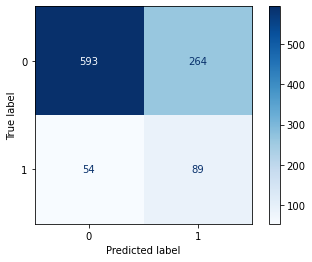

In [35]:
best_knn = KNeighborsClassifier(n_neighbors = 13,
                                metric = 'euclidean',
                                weights = 'uniform') 

best_knn.fit(X_train_scaled_resampled,y_train_resampled)

print('Train_Accuracy:', best_knn.score(X_train_scaled_resampled,y_train_resampled))
print('Test_Accuracy:', best_knn.score(X_test_scaled,y_test))
print('Recall:', recall_score(y_test,best_knn.predict(X_test_scaled)))
print('Precision:',precision_score(y_test,best_knn.predict(X_test_scaled)))
print('F1_Score:',f1_score(y_test,best_knn.predict(X_test_scaled)))
('mean_CV_recall:', np.mean(cross_val_score(best_knn, X_scaled, y, scoring="recall", cv = 5)))

plot_confusion_matrix(best_knn, X_test_scaled, y_test, cmap="Blues")

## Decision Tree Model

Test_Accuracy: 1.0
Test_Accuracy: 0.962
Recall: 0.143
Precision: 0.2502187226596675


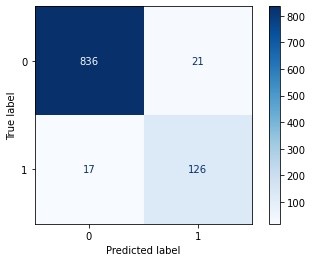

In [36]:
DT_clf = DecisionTreeClassifier()
Train_Test_Scores(DT_clf)

### Hyperparameter Tuning and Pruning in Decision Tree

Tuning the model to avoid issues of overfitting

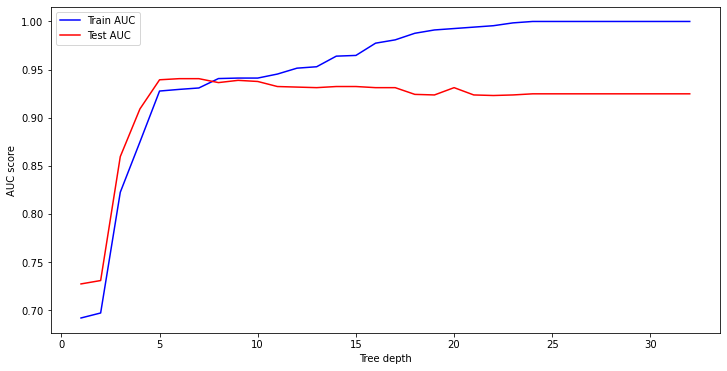

In [37]:
#Maximum Tree Depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   DT = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=1)
   DT.fit(X_train, y_train)
   train_pred = DT.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)


   # Adding AUC score to previous train results
   train_results.append(roc_auc)
   y_pred = DT.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### Final Model Choice

Plotting the ROC curve and getting the AUC so that we can select the final model with this being the consideration.

In [38]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#decision tree
model3 = DecisionTreeClassifier()
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.778573818247097 0.696563063540893 0.9294742596959634


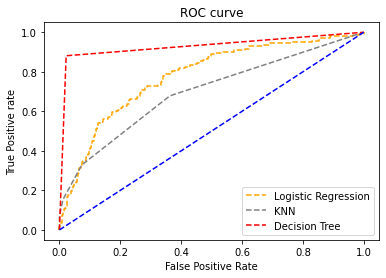

In [39]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='grey', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Conclusion

I will settle with the Decision Tree Classifier since it has the highest testing accuracy, in comparison with the other models, it also has the highest area under the curve. This will be the best model to predict the customers to drop off soon.

### Recommendation


1. Allowing us to look closely into the poorly performing states and Identify whether the network coverage performance and if network coverage is off, we strategize on how to work on having more boosters in the state.<br>

2. We will examine whether a more favorable international charge will make the customers consider SyriaTel's international plan while they are traveling.<br>

3. We would like to consider using a different vendor or temporally partnering to offer incentives and promotions when a customer seems dissatisfied may increase satisfaction and reduce churning.<br>

4. Ultimately, we will implement the new features to see whether churning was reduced and calculate the cost of retaining the customers.